Hello and welcome to the ML part of my IMMOWEB Project. There are two notebooks in this section.

- ML_ALL.ipynb
- ML-SALE&RENT.ipynb

In my 1st file, I saw that a better result can be obtained when the data is separated as rented and for sale, so you can directly examine the 2nd file.

## <p style="background-color:#9B59B6; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> IMPORTS & DATA INFO </p>

In [85]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)

## <p style="background-color:#9B59B6; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Data PreProcessing </p>

In [86]:
# loading data from the csv file that which we took in the end of the data visualization.
df = pd.read_csv('ML1.csv')

In [87]:
# taking information about the our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27945 entries, 0 to 27944
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              27945 non-null  int64  
 1   to_rent                 27945 non-null  bool   
 2   price                   27945 non-null  float64
 3   number_of_rooms         27945 non-null  float64
 4   living_area             27945 non-null  float64
 5   fully_equipped_kitchen  27945 non-null  bool   
 6   furnished               27945 non-null  bool   
 7   open_fire               27945 non-null  bool   
 8   terrace                 27945 non-null  bool   
 9   area_of_the_terrace     27945 non-null  float64
 10  garden                  27945 non-null  bool   
 11  area_of_the_garden      27945 non-null  float64
 12  swimming_pool           27945 non-null  bool   
 13  state_of_the_building   27945 non-null  object 
 14  zipcode                 27945 non-null

In [88]:
# We are dropping unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [89]:
# Inspecting first 5 row in the dataset 
df.head()

,to_rent,price,number_of_rooms,living_area,fully_equipped_kitchen,furnished,open_fire,terrace,area_of_the_terrace,garden,area_of_the_garden,swimming_pool,state_of_the_building,zipcode,type,region,region_be,price_perm2
0,True,485.0,1.0,40.000000,True,False,False,False,0.0,False,0.0,False,excellentétat,4020,Studio,Liège,Region Walloonie,12.125000
1,True,790.0,2.0,140.000000,True,False,False,False,0.0,False,0.0,False,bon,3200,Appartement,Flemish Region,Region Flanders,5.642857
2,True,520.0,2.0,50.000000,True,False,False,False,0.0,False,0.0,False,bon,6900,Appartement,Luxembourg,Region Walloonie,10.400000
3,True,640.0,1.0,160.505415,True,True,False,False,0.0,False,0.0,False,bon,3200,Appartement,Flemish Region,Region Flanders,3.987404
4,True,660.0,2.0,95.000000,True,False,False,False,0.0,False,0.0,False,excellentétat,4920,Appartement,Liège,Region Walloonie,6.947368


In [90]:
# Inspecting last 5 row in the dataset 
df.tail()

,to_rent,price,number_of_rooms,living_area,fully_equipped_kitchen,furnished,open_fire,terrace,area_of_the_terrace,garden,area_of_the_garden,swimming_pool,state_of_the_building,zipcode,type,region,region_be,price_perm2
27940,False,245000.0,5.0,180.0,False,False,False,True,29.0,True,75.0,False,àrafraîchir,4000,Maison,Liège,Region Walloonie,1361.111111
27941,False,479000.0,5.0,150.0,True,False,True,True,20.0,False,0.0,False,excellentétat,1120,Maison,Brussels,Brussels,3193.333333
27942,False,360000.0,4.0,180.0,True,True,True,True,16.0,True,200.0,False,bon,2300,Villa,Antwerp,Region Flanders,2000.000000
27943,False,325000.0,2.0,109.0,True,False,False,True,37.0,False,0.0,True,bon,9500,Bungalow,East Flanders,Region Flanders,2981.651376
27944,False,529000.0,2.0,134.0,True,False,False,False,0.0,False,0.0,False,bon,2018,Appartement,Antwerp,Region Flanders,3947.761194


In [91]:
# Inspecting random 3 row in the dataset 
df.sample(3)

,to_rent,price,number_of_rooms,living_area,fully_equipped_kitchen,furnished,open_fire,terrace,area_of_the_terrace,garden,area_of_the_garden,swimming_pool,state_of_the_building,zipcode,type,region,region_be,price_perm2
8545,False,279150.0,2.0,87.000000,True,False,False,True,10.0,True,0.0,False,excellentétat,2840,Appartement,Antwerp,Region Flanders,3208.620690
256,True,860.0,3.0,160.505415,True,False,False,True,24.0,False,0.0,False,excellentétat,9230,Maison,East Flanders,Region Flanders,5.358075
25799,False,375000.0,3.0,102.000000,True,False,False,True,17.0,False,0.0,False,àrénover,8670,Maison,Walloon Region,Region Walloonie,3676.470588


In [92]:
df.columns

Index(['to_rent', 'price', 'number_of_rooms', 'living_area',
       'fully_equipped_kitchen', 'furnished', 'open_fire', 'terrace',
       'area_of_the_terrace', 'garden', 'area_of_the_garden', 'swimming_pool',
       'state_of_the_building', 'zipcode', 'type', 'region', 'region_be',
       'price_perm2'],
      dtype='object')

In [93]:
df.describe()

,price,number_of_rooms,living_area,area_of_the_terrace,area_of_the_garden,zipcode,price_perm2
count,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000
mean,217064.159420,2.426087,120.429949,12.882806,84.203221,4992.858114,1842.205052
std,181467.711165,0.982920,40.851522,24.821060,1125.329678,2940.766575,1562.226247
min,250.000000,1.000000,20.000000,0.000000,0.000000,236.000000,1.557580
25%,1590.000000,2.000000,87.000000,0.000000,0.000000,2200.000000,15.555556
50%,220000.000000,2.000000,118.000000,10.000000,0.000000,4460.000000,1895.604396
75%,325000.000000,3.000000,160.505415,20.000000,1.000000,8200.000000,2790.209790
max,999000.000000,10.000000,200.000000,2190.000000,80000.000000,9992.000000,17407.407407


### IsNull ? 

In [94]:
# We are checking if there is any missing values ? 
df.isnull().sum()

to_rent                   0
price                     0
number_of_rooms           0
living_area               0
fully_equipped_kitchen    0
furnished                 0
open_fire                 0
terrace                   0
area_of_the_terrace       0
garden                    0
area_of_the_garden        0
swimming_pool             0
state_of_the_building     0
zipcode                   0
type                      0
region                    0
region_be                 0
price_perm2               0
dtype: int64

### Finding outliers

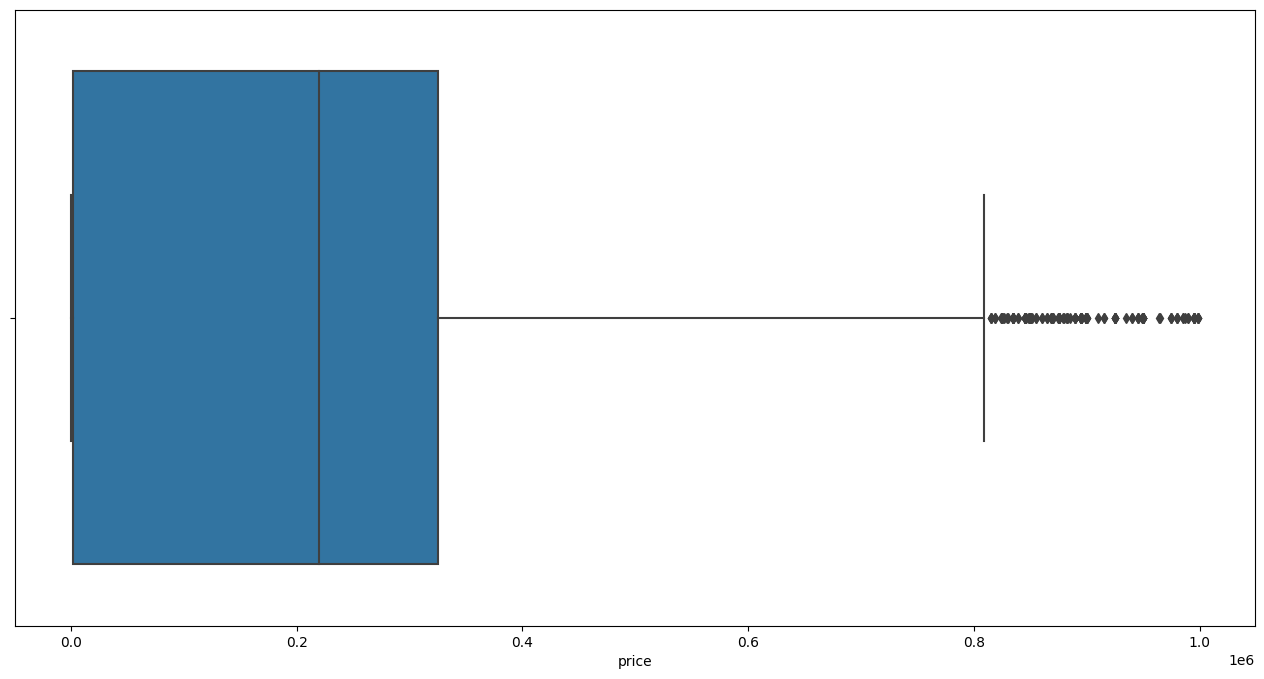

In [95]:
# drawing boxplot for targetting outliers 
plt.figure(figsize=(16,8))
sns.boxplot(x="price", data=df) 
plt.show()

In [96]:
# finding outliers index 
outlier1_ind = df[df.price >= 600000.000000].index
outlier2_ind = df[df.price <= 250.000000].index

In [97]:
outlier1_ind

Int64Index([ 7919,  7922,  7954,  7963,  7966,  8019,  8025,  8032,  8054,
             8068,
            ...
            27698, 27705, 27723, 27729, 27791, 27796, 27805, 27826, 27838,
            27912],
           dtype='int64', length=812)

In [98]:
df.drop(outlier1_ind, inplace=True)
df.drop(outlier2_ind, inplace= True)

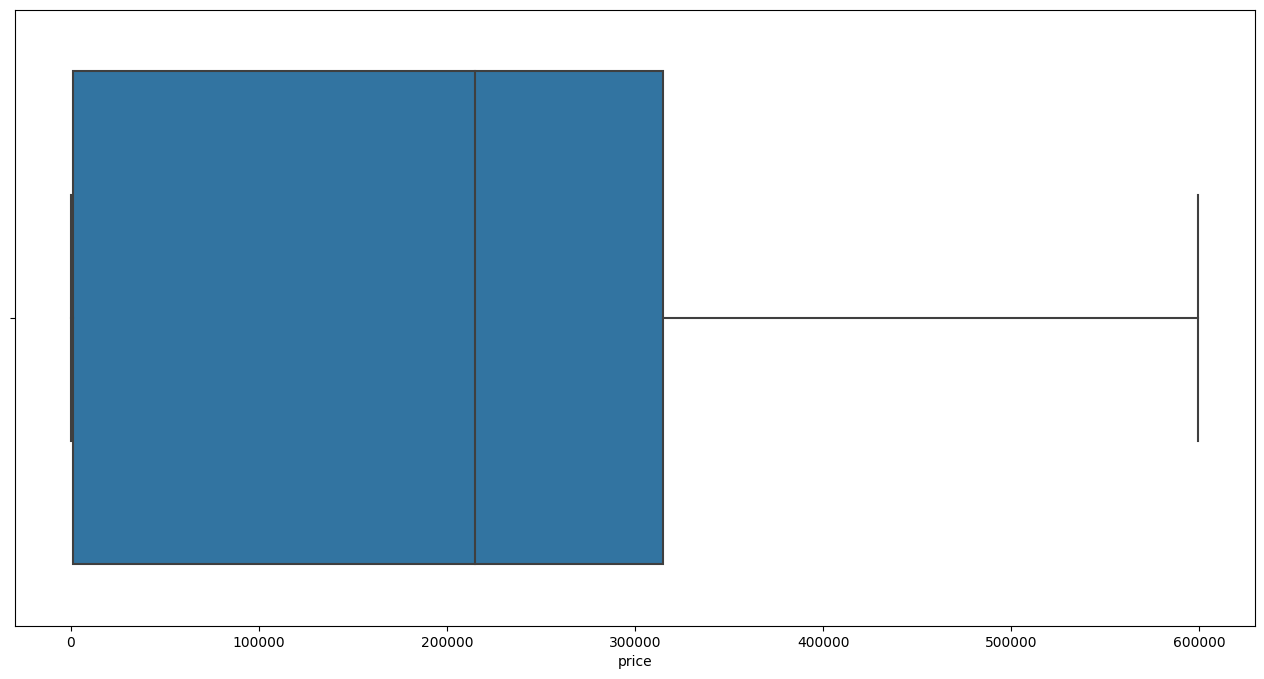

In [99]:
# drawing boxplot for targetting outliers 
plt.figure(figsize=(16,8))
sns.boxplot(x="price", data=df) 
plt.show()

In [100]:
df2 = df.copy()

### Encoding the Categorical Datas And Dropping unrelated columns 

<AxesSubplot: >

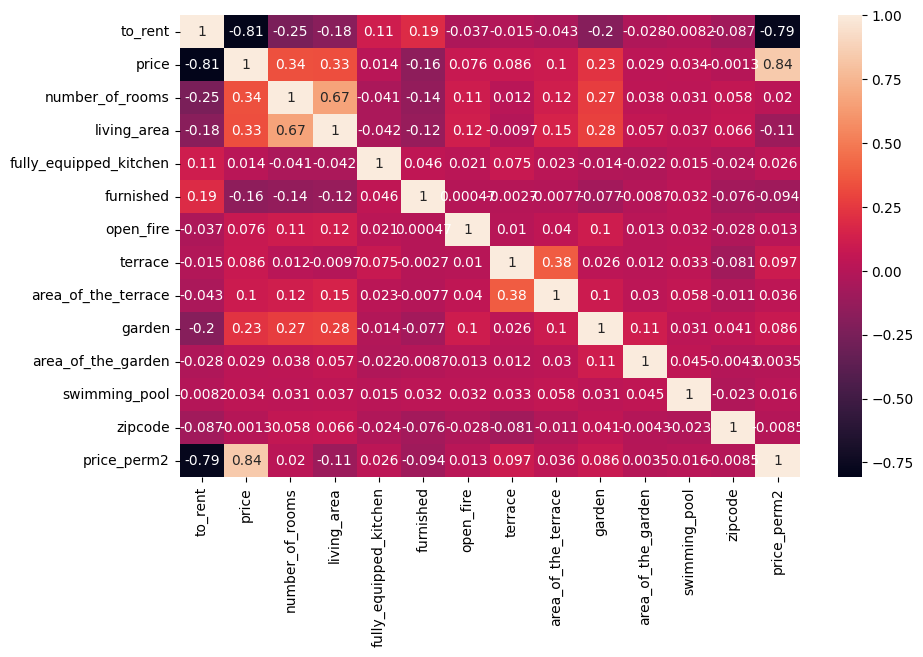

In [101]:
sns.heatmap(df.corr(), annot= True)

In [102]:
df.head(5)

,to_rent,price,number_of_rooms,living_area,fully_equipped_kitchen,furnished,open_fire,terrace,area_of_the_terrace,garden,area_of_the_garden,swimming_pool,state_of_the_building,zipcode,type,region,region_be,price_perm2
0,True,485.0,1.0,40.000000,True,False,False,False,0.0,False,0.0,False,excellentétat,4020,Studio,Liège,Region Walloonie,12.125000
1,True,790.0,2.0,140.000000,True,False,False,False,0.0,False,0.0,False,bon,3200,Appartement,Flemish Region,Region Flanders,5.642857
2,True,520.0,2.0,50.000000,True,False,False,False,0.0,False,0.0,False,bon,6900,Appartement,Luxembourg,Region Walloonie,10.400000
3,True,640.0,1.0,160.505415,True,True,False,False,0.0,False,0.0,False,bon,3200,Appartement,Flemish Region,Region Flanders,3.987404
4,True,660.0,2.0,95.000000,True,False,False,False,0.0,False,0.0,False,excellentétat,4920,Appartement,Liège,Region Walloonie,6.947368


In [103]:
df.drop(['area_of_the_terrace', 'area_of_the_garden','zipcode','type','region_be','price_perm2'], axis=1, inplace=True)

In [104]:
df = pd.get_dummies(df)

In [105]:
df

,to_rent,price,number_of_rooms,living_area,fully_equipped_kitchen,furnished,open_fire,terrace,garden,swimming_pool,...,region_Flemish Brabant,region_Flemish Region,region_Hainaut,region_Limburg,region_Liège,region_Luxembourg,region_Namur,region_Other,region_Walloon Brabant,region_Walloon Region
0,True,485.0,1.0,40.000000,True,False,False,False,False,False,...,0,0,0,0,1,0,0,0,0,0
1,True,790.0,2.0,140.000000,True,False,False,False,False,False,...,0,1,0,0,0,0,0,0,0,0
2,True,520.0,2.0,50.000000,True,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
3,True,640.0,1.0,160.505415,True,True,False,False,False,False,...,0,1,0,0,0,0,0,0,0,0
4,True,660.0,2.0,95.000000,True,False,False,False,False,False,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27940,False,245000.0,5.0,180.000000,False,False,False,True,True,False,...,0,0,0,0,1,0,0,0,0,0
27941,False,479000.0,5.0,150.000000,True,False,True,True,False,False,...,0,0,0,0,0,0,0,0,0,0
27942,False,360000.0,4.0,180.000000,True,True,True,True,True,False,...,0,0,0,0,0,0,0,0,0,0
27943,False,325000.0,2.0,109.000000,True,False,False,True,False,True,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# assign the columns which will be changed 
columns_to_change = ["furnished", "terrace", "garden", "to_rent","fully_equipped_kitchen","swimming_pool","open_fire"]

# looking all the rows in the columns and change it 
for column in columns_to_change:
    df[column] = df[column].replace({True: 1, False: 0})

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27131 entries, 0 to 27944
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   to_rent                                  27131 non-null  int64  
 1   price                                    27131 non-null  float64
 2   number_of_rooms                          27131 non-null  float64
 3   living_area                              27131 non-null  float64
 4   fully_equipped_kitchen                   27131 non-null  int64  
 5   furnished                                27131 non-null  int64  
 6   open_fire                                27131 non-null  int64  
 7   terrace                                  27131 non-null  int64  
 8   garden                                   27131 non-null  int64  
 9   swimming_pool                            27131 non-null  int64  
 10  state_of_the_building_bon                27131

In [108]:
df

,to_rent,price,number_of_rooms,living_area,fully_equipped_kitchen,furnished,open_fire,terrace,garden,swimming_pool,...,region_Flemish Brabant,region_Flemish Region,region_Hainaut,region_Limburg,region_Liège,region_Luxembourg,region_Namur,region_Other,region_Walloon Brabant,region_Walloon Region
0,1,485.0,1.0,40.000000,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,790.0,2.0,140.000000,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,520.0,2.0,50.000000,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,640.0,1.0,160.505415,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,660.0,2.0,95.000000,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27940,0,245000.0,5.0,180.000000,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
27941,0,479000.0,5.0,150.000000,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27942,0,360000.0,4.0,180.000000,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
27943,0,325000.0,2.0,109.000000,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


### Splitting The Data into TRAIN & TEST

In [109]:
df = df.iloc[:, [0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 1]]


In [110]:
df.head(3)

,to_rent,number_of_rooms,living_area,fully_equipped_kitchen,furnished,open_fire,terrace,garden,swimming_pool,state_of_the_building_bon,...,region_Flemish Region,region_Hainaut,region_Limburg,region_Liège,region_Luxembourg,region_Namur,region_Other,region_Walloon Brabant,region_Walloon Region,price
0,1,1.0,40.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,485.0
1,1,2.0,140.0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,790.0
2,1,2.0,50.0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,520.0


In [111]:
# Selecting our FEATURES AND TARGET
X = df.drop(['price'], axis=1)
y = df['price']

In [112]:
X

,to_rent,number_of_rooms,living_area,fully_equipped_kitchen,furnished,open_fire,terrace,garden,swimming_pool,state_of_the_building_bon,...,region_Flemish Brabant,region_Flemish Region,region_Hainaut,region_Limburg,region_Liège,region_Luxembourg,region_Namur,region_Other,region_Walloon Brabant,region_Walloon Region
0,1,1.0,40.000000,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,2.0,140.000000,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,2.0,50.000000,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,1.0,160.505415,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,2.0,95.000000,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27940,0,5.0,180.000000,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
27941,0,5.0,150.000000,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27942,0,4.0,180.000000,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
27943,0,2.0,109.000000,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [113]:
y

0           485.0
1           790.0
2           520.0
3           640.0
4           660.0
           ...   
27940    245000.0
27941    479000.0
27942    360000.0
27943    325000.0
27944    529000.0
Name: price, Length: 27131, dtype: float64

In [114]:
# assingning our train and test variables and selecting our test ratio 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <p style="background-color:#9B59B6; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Linear  Regression </p>

In [115]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [116]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

### Model Evulation

In [117]:
# prediction on tarining data 
training_data_prediction = lin_reg_model.predict(X_train)

# R2 ERROR 
error_score = metrics.r2_score(Y_train, training_data_prediction)

print('R squared error: ', error_score)

R squared error:  0.7557063985448789


Visualize The Predicted Price and Actual Prices

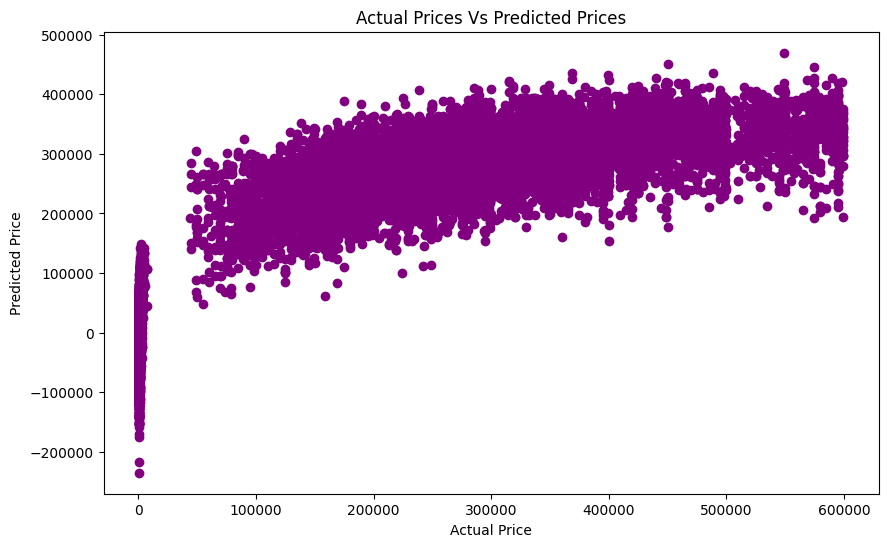

In [118]:
plt.scatter(Y_train, training_data_prediction, c='purple')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()

In [126]:
y.describe()

count     27131.000000
mean     201450.765729
std      158769.420732
min         275.000000
25%        1450.000000
50%      215000.000000
75%      315000.000000
max      599500.000000
Name: price, dtype: float64

In [119]:
# prediction on test data 

test_data_prediction = lin_reg_model.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error: ', error_score)

R squared error:  0.7579151218982015


Visualize The Predicted Price and Actual Prices

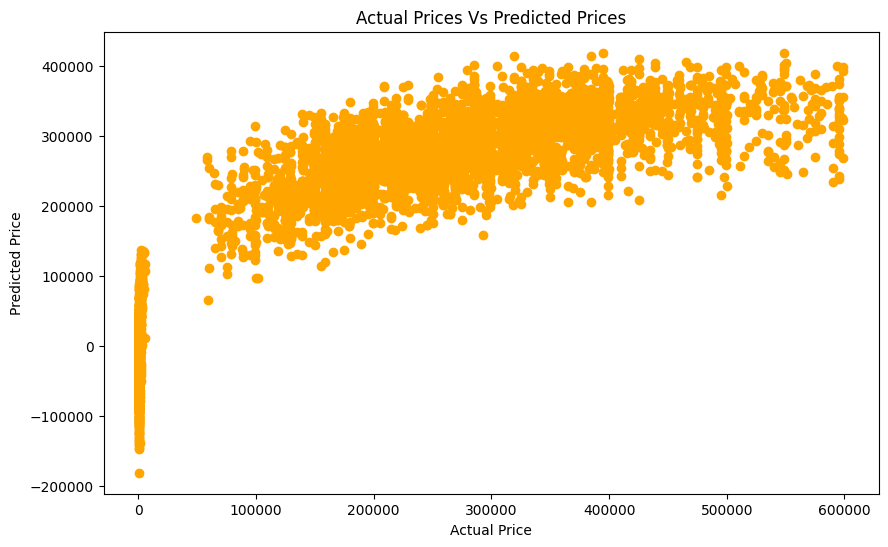

In [120]:
plt.scatter(Y_test, test_data_prediction, c='orange')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()

## <p style="background-color:#9B59B6; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Lasso  Regression </p>

In [121]:
lasso_reg_model = Lasso()

In [122]:
lasso_reg_model.fit(X_train, Y_train)

Lasso()

Model Evulation

In [123]:
# prediction on tarining data 
training_data_prediction = lasso_reg_model.predict(X_train)

# R2 ERROR 
error_score = metrics.r2_score(Y_train, training_data_prediction)

print('R squared error: ', error_score)

R squared error:  0.7557055148352328


In [124]:
# prediction on test data 

test_data_prediction = lasso_reg_model.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error: ', error_score)

R squared error:  0.7579204767890502


For detailed and better Models Please enter ML_SALE and ML_RENT notebooks

In [125]:
df2.to_csv('ML2.csv')

## <p style="background-color:#9B59B6; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;"> Conclusion </p>

<style>
  img {
    width: 600px;
    height: 400px;
  }
</style>

<img src="https://i.hizliresim.com/2skaubr.png" alt="ML MODEL Image">
 

As you can see, although we work with clean and organized data, the price difference between rental and sale real estate data is very clear, which affects our model. That's why I decided to analyze these two data in two separate dataframes as Sale and Rent in a second notebook and to build the same model again.